In [1]:
import os
import random

#data
import pandas as pd

# math
import numpy as np

# plotting
from matplotlib import pyplot as plt

# Machine learning
import sklearn
from sklearn import tree

Here I am training a Decision Tree model to predict the rmsd value of the template-based docked pose

1) Test set and training set don't have the same molecules

In [2]:
from tools import get_train_test_folds

no_inconcl_df, train_test_folds_indexes, train_test_folds_dfs = get_train_test_folds.get_train_test_folds(lower_threshold=2.4,
                                                                                               upper_threshold=2.4,
                                                                                                number_of_repeats=4)
no_inconcl_df.head()


['template_HeavyAtomCount', 'template_NHOHCount', 'template_NOCount', 'template_RingCount', 'template_NumHAcceptors', 'template_NumHDonors', 'template_NumHeteroAtoms', 'template_NumRotatableBonds', 'docked_HeavyAtomCount', 'docked_NHOHCount', 'docked_NOCount', 'docked_RingCount', 'docked_NumHAcceptors', 'docked_NumHDonors', 'docked_NumHeteroAtoms', 'docked_NumRotatableBonds', 'mcs_HeavyAtomCount', 'mcs_NOCount', 'mcs_RingCount', 'mcs_NumHeteroAtoms', 'mcs_template_NHOHCount', 'mcs_docked_NHOHCount', 'mcs_template_NumHAcceptors', 'mcs_docked_NumHAcceptors', 'mcs_template_NumHDonors', 'mcs_docked_NumHDonors', 'mcs_template_NumRotatableBonds', 'mcs_docked_NumRotatableBonds', 'ec_tanimoto_similarity', 'fc_tanimoto_similarity', 'mcs_bonded_polar_sasa', 'mcs_bonded_apolar_sasa', 'mcs_unbonded_polar_sasa', 'mcs_unbonded_apolar_sasa', 'sasa_bonded_polar', 'sasa_bonded_apolar', 'sasa_unbonded_polar', 'sasa_unbonded_apolar', 'group']
{1: 7399, 2: 4296, 5: 788, 6: 1053, 9: 408, 10: 695, 11: 593, 

,template,docked,rmsd,uniprot_id,smiles_template,smiles_docked,mcs_smartsString,template_HeavyAtomCount,template_NHOHCount,template_NOCount,...,mcs_bonded_polar_sasa,mcs_bonded_apolar_sasa,mcs_unbonded_polar_sasa,mcs_unbonded_apolar_sasa,sasa_bonded_polar,sasa_bonded_apolar,sasa_unbonded_polar,sasa_unbonded_apolar,group,binned_rmsd
0,2JH5_895,1ZRB_062,6.813,P00734,C[C@@H](C(=O)N1CCOCC1)N1CC[C@H](NS(=O)(=O)/C=C...,NCc1ccc(Cl)cc1CNC(=O)[C@@H]1CCCN1C(=O)[C@@]1(O...,[#6]-[#6](-[#6](=[#8])-[#7]-[#6]-[#6])-[#7](-[...,28,1,8,...,21.671938,61.229232,54.463312,185.918549,48.245348,73.835544,214.880999,407.758869,1,0
1,2JH5_895,3QWC_98P,5.856,P00734,C[C@@H](C(=O)N1CCOCC1)N1CC[C@H](NS(=O)(=O)/C=C...,C[n+]1ccc(Cl)c(CNC(=O)[C@@H]2CCCN2C(=O)[C@H](N...,[#6]-[#6]-[#7]-[#6](=[#8])-[#6](-[#6])-[#7](-[...,28,1,8,...,27.777119,61.229232,63.923964,185.918549,48.245348,73.835544,214.880999,407.758869,1,0
2,2JH5_895,1MUE_CDD,8.229,P00734,C[C@@H](C(=O)N1CCOCC1)N1CC[C@H](NS(=O)(=O)/C=C...,O=C(Cn1c(Cl)cnc(NCC(F)(F)c2cccc[n+]2[O-])c1=O)...,"[#6](-,:[#6](=[#8])-,:[#7](-[#6]-[#6])-,:[#6]-...",28,1,8,...,20.905065,48.767619,37.666173,181.830981,48.245348,73.835544,214.880999,407.758869,1,0
3,2JH5_895,4YES_45S,3.128,P00734,C[C@@H](C(=O)N1CCOCC1)N1CC[C@H](NS(=O)(=O)/C=C...,Cc1ccc(C(=O)N2CCC[C@H]2C(=O)NCc2cc(Cl)ccc2CN)[...,"[#6]:,-[#6]:,-[#6](-[#6](=[#8])-[#7]-[#6](-[#6...",28,1,8,...,27.777119,61.229232,63.923964,185.918549,48.245348,73.835544,214.880999,407.758869,1,0
4,2JH5_895,1TA2_176,6.158,P00734,C[C@@H](C(=O)N1CCOCC1)N1CC[C@H](NS(=O)(=O)/C=C...,N[C@@H](C(=O)N1CCC[C@H]1C(=O)NCc1cc(Cl)ccc1Cl)...,[#6]-[#6](-[#6](=[#8])-[#7]-[#6]-[#6])-[#7](-[...,28,1,8,...,27.777119,61.229232,63.923964,185.918549,48.245348,73.835544,214.880999,407.758869,1,0


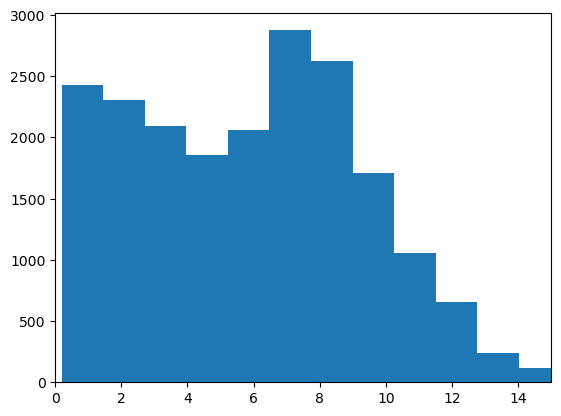

In [12]:
plt.style.use('default')
plt.hist(no_inconcl_df['rmsd'], bins=15)
plt.xlim([0,15])
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(estimator=tree.DecisionTreeRegressor(class_weight="balanced"),
                 param_grid={'max_depth':[i for i in range(1,10)]},
                 scoring={'f1_score':sklearn.metrics.make_scorer(sklearn.metrics.f1_score),
                          'recall':sklearn.metrics.make_scorer(sklearn.metrics.recall_score),
                          'precision':sklearn.metrics.make_scorer(sklearn.metrics.precision_score),
                           'roc_auc':sklearn.metrics.make_scorer(sklearn.metrics.roc_auc_score)},
                 refit='f1_score',
                 n_jobs=-1,
                 cv=train_test_folds_indexes,
                 verbose=1)

In [7]:
not_features = ['template', 'docked', 'rmsd', 'uniprot_id', 'mcs_smartsString',
                    'smiles_template', 'smiles_docked', 'binned_rmsd']

In [ ]:
feats = no_inconcl_df.drop(columns=not_features + ['group']).values.tolist()
labels = no_inconcl_df[['binned_rmsd']].values.tolist()

In [5]:
clf.fit(feats, labels)

Fitting 40 folds for each of 6 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   34.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  4.0min finished


GridSearchCV(cv=[[array([14639, 14640, 14641, ..., 19535, 19536, 19537]),
                  array([17014, 17015, 17016, ..., 19797, 19798, 19799])],
                 [array([17014, 17015, 17016, ..., 19535, 19536, 19537]),
                  array([14639, 14640, 14641, ..., 18681, 18682, 18683])],
                 [array([17014, 17015, 17016, ..., 19535, 19536, 19537]),
                  array([19855, 19856, 15712, ..., 13533, 13534, 13535])],
                 [array([17014, 17015, 17016, ..., 135...
                 [array([17808, 17809, 17810, ..., 19183, 19184, 19185]),
                  array([ 7399,  7400,  7401, ..., 19986, 19987, 19988])], ...],
             estimator=DecisionTreeClassifier(class_weight='balanced'),
             n_jobs=-1, param_grid={'max_depth': [1, 2, 3, 4, 5, 6]},
             refit='f1_score',
             scoring={'f1_score': make_scorer(f1_score),
                      'precision': make_scorer(precision_score),
                      'recall': make_scorer(r

In [6]:
cv_results = clf.cv_results_
cv_results.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_max_depth', 'params', 'split0_test_f1_score', 'split1_test_f1_score', 'split2_test_f1_score', 'split3_test_f1_score', 'split4_test_f1_score', 'split5_test_f1_score', 'split6_test_f1_score', 'split7_test_f1_score', 'split8_test_f1_score', 'split9_test_f1_score', 'split10_test_f1_score', 'split11_test_f1_score', 'split12_test_f1_score', 'split13_test_f1_score', 'split14_test_f1_score', 'split15_test_f1_score', 'split16_test_f1_score', 'split17_test_f1_score', 'split18_test_f1_score', 'split19_test_f1_score', 'split20_test_f1_score', 'split21_test_f1_score', 'split22_test_f1_score', 'split23_test_f1_score', 'split24_test_f1_score', 'split25_test_f1_score', 'split26_test_f1_score', 'split27_test_f1_score', 'split28_test_f1_score', 'split29_test_f1_score', 'split30_test_f1_score', 'split31_test_f1_score', 'split32_test_f1_score', 'split33_test_f1_score', 'split34_test_f1_score', 'split35_test_f1_score', 

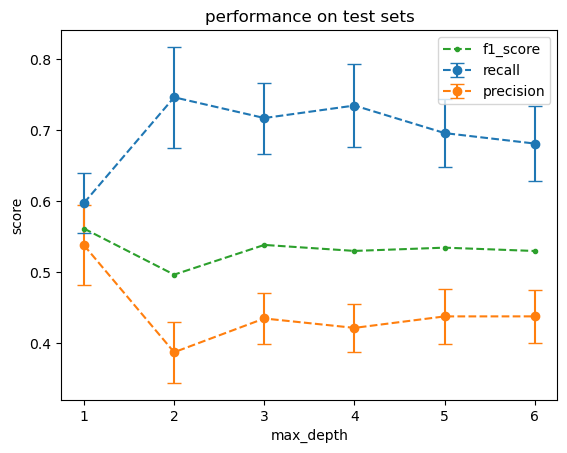

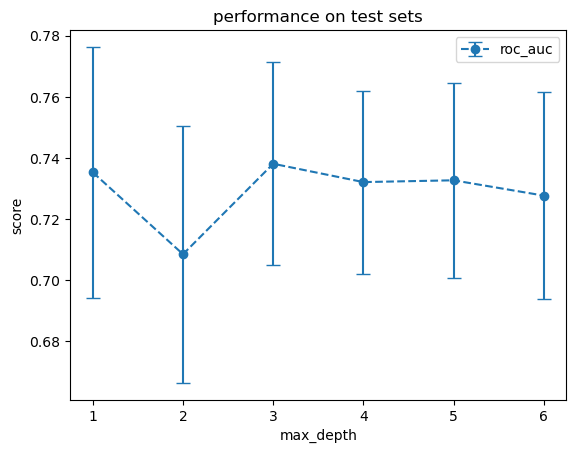

In [8]:
plt.style.use('default')
plt.errorbar(cv_results['param_max_depth'].data, cv_results['mean_test_recall'], yerr=0.5*cv_results['std_test_recall'], capsize=5, fmt='--o', label='recall')
plt.errorbar(cv_results['param_max_depth'].data, cv_results['mean_test_precision'], yerr=0.5*cv_results['std_test_precision'], capsize=5, fmt='--o', label='precision')
#plt.errorbar(cv_results['param_max_depth'].data, cv_results['mean_test_f1_score'], yerr=cv_results['std_test_f1_score'], capsize=5, fmt='--o', label='f1_score')
plt.plot(cv_results['param_max_depth'].data, cv_results['mean_test_f1_score'], '--.',label='f1_score')
plt.xlabel('max_depth')
plt.ylabel('score')
plt.legend()
plt.title('performance on test sets')
plt.show()

plt.errorbar(cv_results['param_max_depth'].data, cv_results['mean_test_roc_auc'], yerr=cv_results['std_test_roc_auc'], capsize=5, fmt='--o', label='roc_auc')
plt.xlabel('max_depth')
plt.ylabel('score')
plt.legend()
plt.title('performance on test sets')
plt.show()

In [4]:
train_test=random.sample(train_test_folds_dfs, len(train_test_folds_dfs)).copy()

clf = tree.DecisionTreeClassifier(max_depth=3, class_weight="balanced")

In [5]:
from sklearn import inspection

rr = []
for train, test in train_test:

    _feats_train = train.drop(columns=not_features + ['group']).values.tolist()
    _labels_train = train[['binned_rmsd']].values.tolist()
    _feats_test = test.drop(columns=not_features + ['group']).values.tolist()
    _labels_test = test[['binned_rmsd']].values.tolist()

    clf = clf.fit(_feats_train, _labels_train)

    r = inspection.permutation_importance(clf, _feats_test, _labels_test,
                                      scoring=sklearn.metrics.make_scorer(sklearn.metrics.roc_auc_score),
                                      n_repeats=100,
                                      n_jobs=-1)
    rr += [r]

In [8]:
features = no_inconcl_df.drop(columns=not_features).columns.tolist()

In [ ]:
r = {'importances_mean': 0,
     'importances_std': 0}
for i in rr:
    r['importances_mean'] += i['importances_mean']/len(rr)
    r['importances_std'] += i['importances_std']/len(rr)

for i in r['importances_mean'].argsort()[::-1]:
    if r['importances_mean'][i] - 1 * r['importances_std'][i] > 0:
        print(f"{features[i]:<30}"
              f"{r['importances_mean'][i]:.3f}"
              f" +/- {r['importances_std'][i]:.3f}")

In [9]:
for train, test in train_test:
    train['dt_score'] = None
    test['dt_score'] = None

top = 1
range_of_thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
proportion_top = []
range_of_top = [1,2,3,4,5,6,7,8,9,10]
proportion_thresh = []
valids_thresh = []
for train, test in train_test:
    _feats_train = train.drop(columns=not_features + ['group', 'dt_score']).values.tolist()
    _labels_train = train[['binned_rmsd']].values.tolist()
    _feats_test = test.drop(columns=not_features + ['group', 'dt_score']).values.tolist()
    clf = clf.fit(_feats_train, _labels_train)
    test['dt_score'] = clf.predict_proba(_feats_test)[:,1]
    _proportion = []
    for i in range_of_top:
        count = 0
        for docked in test['docked'].drop_duplicates().values:
                if test.loc[(test['docked']==docked)] \
                                     .sort_values(by=['dt_score'], ascending=False)[:i] \
                                     .loc[test['rmsd']<2].shape[0] > 0:
                    count += 1
        _proportion += [count/test['docked'].drop_duplicates().shape[0]]
    proportion_top += [_proportion]

    _proportion = []
    _valids = []
    for i in range_of_thresholds:
        count = 0
        valid = 0
        for docked in test['docked'].drop_duplicates().values:
            if test.loc[(test['docked']==docked)
                                      & (test['dt_score']>i)].shape[0] > 0:
                valid += 1
                if test.loc[(test['docked']==docked) & (test['dt_score']>i)] \
                                     .sort_values(by=['dt_score'], ascending=False)[:top] \
                                     .loc[test['rmsd']<2].shape[0] > 0:
                    count += 1
        _valids += [valid/test['docked'].drop_duplicates().shape[0]]
        _proportion += [count/valid]
    proportion_thresh += [_proportion]
    valids_thresh += [_valids]


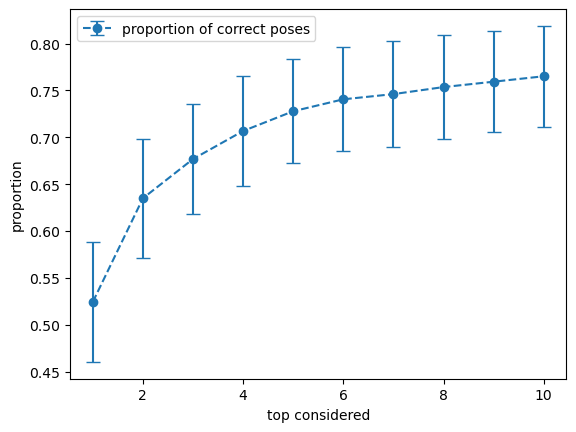

In [10]:
plt.style.use('default')
mean_proportion_top = []
std_proportion_top = []
for i in range(len(range_of_top)):
    mean_proportion_top += [np.mean(np.array(proportion_top)[:,i])]
    std_proportion_top += [np.std(np.array(proportion_top)[:,i])]

plt.errorbar(range_of_top, mean_proportion_top, yerr=std_proportion_top, capsize=5, fmt='--o', label='proportion of correct poses')
plt.xlabel('top considered')
plt.ylabel('proportion')
plt.legend()
plt.show()

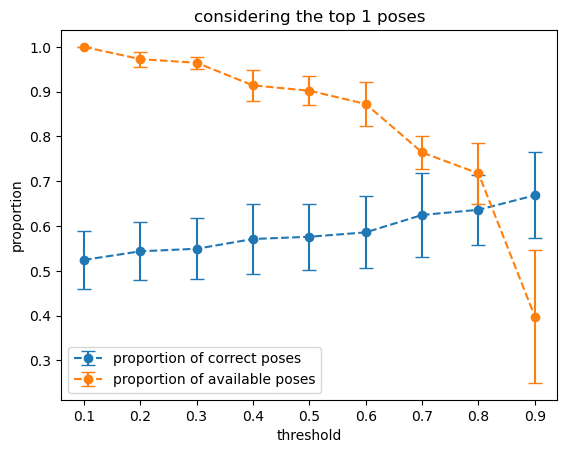

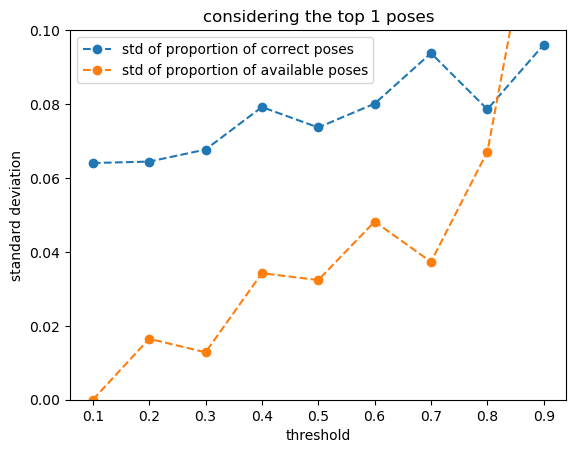

In [11]:
plt.style.use('default')
mean_proportion_thresh = []
mean_valids_thresh = []
std_proportion_thresh = []
std_valids_thresh = []
for i in range(len(range_of_thresholds)):
    mean_proportion_thresh += [np.mean(np.array(proportion_thresh)[:,i])]
    mean_valids_thresh += [np.mean(np.array(valids_thresh)[:,i])]
    std_proportion_thresh += [np.std(np.array(proportion_thresh)[:,i])]
    std_valids_thresh += [np.std(np.array(valids_thresh)[:,i])]

plt.errorbar(range_of_thresholds, mean_proportion_thresh, yerr=std_proportion_thresh, capsize=5, fmt='--o', label='proportion of correct poses')
plt.errorbar(range_of_thresholds, mean_valids_thresh, yerr=std_valids_thresh, capsize=5, fmt='--o', label='proportion of available poses')
plt.xlabel('threshold')
plt.ylabel('proportion')
plt.title('considering the top '+str(top)+' poses')
plt.legend()
plt.show()

plt.plot(range_of_thresholds, std_proportion_thresh, '--o', label='std of proportion of correct poses')
plt.plot(range_of_thresholds, std_valids_thresh, '--o', label='std of proportion of available poses')
plt.xlabel('threshold')
plt.ylabel('standard deviation')
plt.title('considering the top '+str(top)+' poses')
plt.ylim([0,0.1])
plt.legend()
plt.show()